# Digit Recognition System using MNIST Dataset

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

### Loading MNIST dataset and splitting train and test

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

### Plotting training images with labels

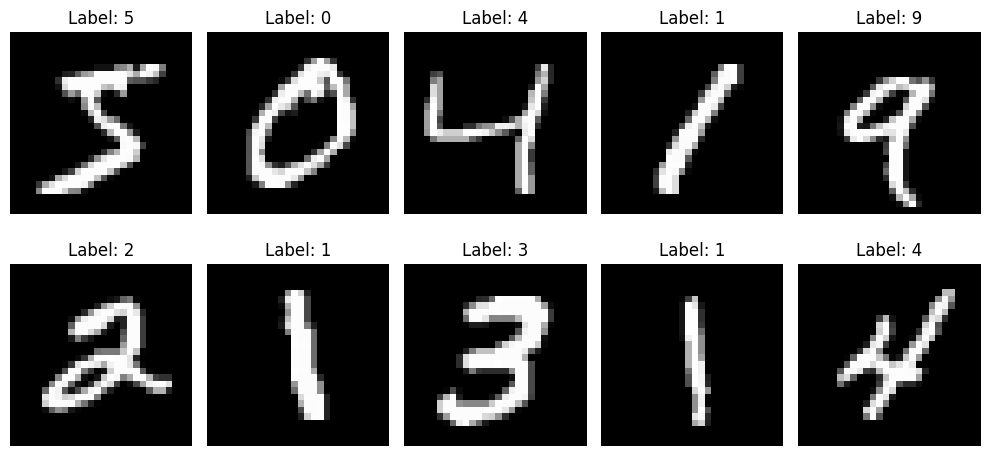

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Calculate number of images in training and testing Datasets

In [4]:
len(X_train),len(X_test)

(60000, 10000)

In [5]:
len(y_train),len(y_test)

(60000, 10000)

### The shape of the training dataset (X_train), indicating the number of samples, height, and width of each image. For example, (60000, 28, 28) means there are 60,000 images, each of size 28x28 pixels.

In [6]:
X_train.shape

(60000, 28, 28)

### 29th image from the training (X_train)dataset

In [7]:
X_train[28]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  80, 189, 254, 255, 254, 254, 254, 174,
        101,  31,  50,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalizing the Pixel value for both X_train and y_train by 255 and scale them in range of 0 to 1

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [11]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(784,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu',activity_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax'),
])
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
for epoch in range(1, 21):
    print(f"Epoch {epoch}/20")
    model.fit(X_train_flattened, y_train, epochs=1, batch_size=64, verbose=1)
    loss, accuracy = model.evaluate(X_test_flattened, y_test, verbose=0)
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}\n")

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7837 - loss: 2.1939
Loss: 0.2479, Accuracy: 0.9428

Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9232 - loss: 0.3719
Loss: 0.1987, Accuracy: 0.9505

Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9434 - loss: 0.2666
Loss: 0.1288, Accuracy: 0.9684

Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9507 - loss: 0.2240
Loss: 0.1224, Accuracy: 0.9704

Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9549 - loss: 0.1996
Loss: 0.1108, Accuracy: 0.9731

Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9615 - loss: 0.1734
Loss: 0.1060, Accuracy: 0.9735

Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9629 - loss: 0.1599
Loss: 0.1102, Accuracy: 0.9700

Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9660 - loss: 0.1466
Loss: 0.0892, Accuracy: 0.9774

Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - ac

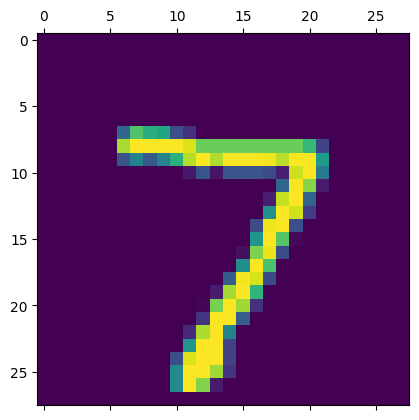

In [14]:
plt.matshow(X_test[0])

In [15]:
y_test[0]

7

In [16]:
model.predict(X_test_flattened)
y = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
y_test[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

In [18]:
y_predicted_labels = [np.argmax(i) for i in y ]
y_predicted_labels[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1]

In [19]:
model.save('mnist_digit_recognizer11.h5')